In [1]:
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, VotingClassifier
from sklearn.model_selection import GridSearchCV, cross_validate, cross_val_score, cross_val_predict
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns



#  Data Modelling Libraries
from sklearn.ensemble import (RandomForestClassifier, AdaBoostClassifier,
                             GradientBoostingClassifier, ExtraTreesClassifier,
                             VotingClassifier)

from sklearn.model_selection import (GridSearchCV, cross_val_score, cross_val_predict,
                                     StratifiedKFold, learning_curve)


from sklearn.metrics import (confusion_matrix, accuracy_score) 
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC

import warnings
from collections import Counter

In [3]:
train_df = pd.read_csv('Pendapatan.csv')
test_df = pd.read_csv('Pendapatan_test.csv')

train_df

,id,Umur,Kelas Pekerja,Berat Akhir,Pendidikan,Jmlh Tahun Pendidikan,Status Perkawinan,Pekerjaan,Jenis Kelamin,Keuntungan Kapital,Kerugian Capital,Jam per Minggu,Gaji
0,27247,59,Pemerintah Negara,139616,Master,14,Menikah,Ekesekutif Managerial,Laki2,0.0,0.0,50.0,1
1,1640,52,Wiraswasta,158993,SMA,9,Cerai,Servis Lainnya,Perempuan,0.0,0.0,38.0,0
2,45206,52,Pekerja Bebas Bukan Perusahan,284648,SMA,9,Cerai,Ekesekutif Managerial,Perempuan,0.0,0.0,99.0,1
3,16154,45,Wiraswasta,132847,SMA,9,Belum Pernah Menikah,Pembersih,Perempuan,0.0,0.0,40.0,0
4,43023,28,Wiraswasta,103432,SMA,9,Belum Pernah Menikah,Supir,Laki2,0.0,0.0,45.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
38388,46220,47,Pekerja Bebas Bukan Perusahan,148169,SMA,9,Menikah,Perbaikan Kerajinan,Laki2,0.0,0.0,40.0,0
38389,33268,69,Pekerja Bebas Perusahaan,264722,D3,12,Menikah,Sales,Laki2,0.0,0.0,40.0,1
38390,44845,24,Pekerja Bebas Bukan Perusahan,31606,Sarjana,13,Menikah,Spesialis,Perempuan,0.0,0.0,20.0,1
38391,4517,47,Wiraswasta,197836,SMA,9,Menikah,Sales,Laki2,0.0,0.0,45.0,0


In [4]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 38393 entries, 0 to 38392
Data columns (total 13 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   id                     38393 non-null  int64  
 1   Umur                   38393 non-null  int64  
 2   Kelas Pekerja          38393 non-null  object 
 3   Berat Akhir            38393 non-null  int64  
 4   Pendidikan             38393 non-null  object 
 5   Jmlh Tahun Pendidikan  38393 non-null  int64  
 6   Status Perkawinan      38393 non-null  object 
 7   Pekerjaan              38393 non-null  object 
 8   Jenis Kelamin          38393 non-null  object 
 9   Keuntungan Kapital     38393 non-null  float64
 10  Kerugian Capital       38393 non-null  float64
 11  Jam per Minggu         38393 non-null  float64
 12  Gaji                   38393 non-null  int64  
dtypes: float64(3), int64(5), object(5)
memory usage: 3.8+ MB


In [5]:
def find_missing_data(data):
    Total = data.isnull().sum().sort_values(ascending = False)
    Percentage = (data.isnull().sum()/data.isnull().count()).sort_values(ascending = False)
    
    return pd.concat([Total,Percentage] , axis = 1 , keys = ['Total' , '%'])

find_missing_data(train_df)

,Total,%
Gaji,0,0.0
Jam per Minggu,0,0.0
Kerugian Capital,0,0.0
Keuntungan Kapital,0,0.0
Jenis Kelamin,0,0.0
Pekerjaan,0,0.0
Status Perkawinan,0,0.0
Jmlh Tahun Pendidikan,0,0.0
Pendidikan,0,0.0
Berat Akhir,0,0.0


In [6]:
find_missing_data(test_df)

,Total,%
Jam per Minggu,0,0.0
Kerugian Capital,0,0.0
Keuntungan Kapital,0,0.0
Jenis Kelamin,0,0.0
Pekerjaan,0,0.0
Status Perkawinan,0,0.0
Jmlh Tahun Pendidikan,0,0.0
Pendidikan,0,0.0
Berat Akhir,0,0.0
Kelas Pekerja,0,0.0


In [7]:
all_data=[train_df, test_df]
str_list=[]

for data in all_data:
    for colname, colvalue in data.iteritems(): 
        if type(colvalue[1]) == str:
            str_list.append(colname) 
num_list = data.columns.difference(str_list)

In [8]:
num_list

Index(['Berat Akhir', 'Jam per Minggu', 'Jmlh Tahun Pendidikan',
       'Kerugian Capital', 'Keuntungan Kapital', 'Umur', 'id'],
      dtype='object')

In [9]:
train_df['Kelas Pekerja'].unique()

array(['Pemerintah Negara', 'Wiraswasta', 'Pekerja Bebas Bukan Perusahan',
       '?', 'Pemerintah Lokal', 'Pekerja Bebas Perusahaan',
       'Pemerintah Provinsi', 'Tanpa di Bayar', 'Tidak Pernah Bekerja'],
      dtype=object)

In [10]:
# # the code will replace the special character to nan
# for data in all_data:
#     for i in data.columns:
#         data[i].replace('?', np.nan, inplace=True)
#     data.dropna(inplace=True)

In [11]:
find_missing_data(train_df)

,Total,%
Gaji,0,0.0
Jam per Minggu,0,0.0
Kerugian Capital,0,0.0
Keuntungan Kapital,0,0.0
Jenis Kelamin,0,0.0
Pekerjaan,0,0.0
Status Perkawinan,0,0.0
Jmlh Tahun Pendidikan,0,0.0
Pendidikan,0,0.0
Berat Akhir,0,0.0


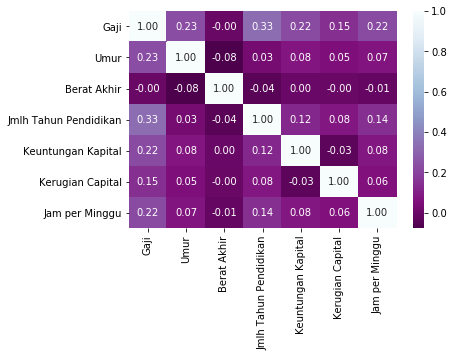

In [12]:
corr_numeric = sns.heatmap(train_df[['Gaji','Umur','Berat Akhir','Jmlh Tahun Pendidikan','Keuntungan Kapital',
                                     'Kerugian Capital','Jam per Minggu']].corr(),
                           annot=True, fmt = ".2f", cmap = "BuPu_r")

In [13]:
def detect_outliers(df,n,features):
    """
    Takes a dataframe df of features and returns a list of the indices
    corresponding to the observations containing more than n outliers according
    to the Tukey method.
    """
    outlier_indices = []
    
    # iterate over features(columns)
    for col in features:
        
        # 1st quartile (25%)
        Q1 = np.percentile(df[col], 25)
        
        # 3rd quartile (75%)
        Q3 = np.percentile(df[col],75)
        
        # Interquartile range (IQR)
        IQR = Q3 - Q1
        
        # outlier step
        outlier_step = 1.5 * IQR
                # Determine a list of indices of outliers for feature col
        outlier_list_col = df[(df[col] < Q1 - outlier_step) | 
                              (df[col] > Q3 + outlier_step )].index
        # append the found outlier indices for col to the list of outlier indices 
        outlier_indices.extend(outlier_list_col)
   
        
    # select observations containing more than 2 outliers
    outlier_indices = Counter(outlier_indices)  

    multiple_outliers = list( k for k, v in outlier_indices.items() if v > n )
    return multiple_outliers   

# detect outliers from Age, SibSp , Parch and Fare
Outliers_to_drop = detect_outliers(train_df,2,['Berat Akhir', 'Jam per Minggu', 'Jmlh Tahun Pendidikan',
       'Kerugian Capital', 'Keuntungan Kapital', 'Umur',])

In [14]:
train_df = train_df.drop(Outliers_to_drop, axis = 0).reset_index(drop=True)

In [15]:
train_df['Pendidikan'].unique() #ordinal

array(['Master', 'SMA', 'Sarjana', '10th', 'Pendidikan Tinggi', '11th',
       'D4', 'D3', 'Sekolah Professional', '9th', '7th-8th', 'Doktor',
       '1st-4th', '5th-6th', '12th', 'SD'], dtype=object)

In [16]:
train_df['Status Perkawinan'].unique() # non ordinal

array(['Menikah', 'Cerai', 'Belum Pernah Menikah', 'Berpisah',
       'Menikah LDR', 'Janda'], dtype=object)

In [17]:
train_df['Kelas Pekerja'].unique()

array(['Pemerintah Negara', 'Wiraswasta', 'Pekerja Bebas Bukan Perusahan',
       '?', 'Pemerintah Lokal', 'Pekerja Bebas Perusahaan',
       'Pemerintah Provinsi', 'Tanpa di Bayar', 'Tidak Pernah Bekerja'],
      dtype=object)

In [18]:
train_df['Pekerjaan'].unique()

array(['Ekesekutif Managerial', 'Servis Lainnya', 'Pembersih', 'Supir',
       'Sales', 'Perbaikan Kerajinan', '?', 'Tech-support',
       'Pemuka Agama', 'Spesialis', 'Mesin Inspeksi', 'Petani', 'Penjaga',
       'Asisten Rumah Tangga', 'Tentara'], dtype=object)

In [19]:
train_df['Jenis Kelamin'].unique() # non ordinal

array(['Laki2', 'Perempuan'], dtype=object)

In [20]:
a = train_df[['Pekerjaan','Gaji']].groupby('Pekerjaan').sum()
a

,Gaji
Pekerjaan,
?,211
Asisten Rumah Tangga,3
Ekesekutif Managerial,2258
Mesin Inspeksi,308
Pembersih,108
Pemuka Agama,630
Penjaga,225
Perbaikan Kerajinan,1061
Petani,131


In [21]:
sorted(a['Gaji'])

[3, 4, 108, 131, 151, 211, 225, 308, 327, 382, 630, 1061, 1158, 2208, 2258]

In [22]:
jobs = {'Asisten Rumah Tangga':0, #3
        'Tentara':1, #4
        'Pembersih':2, #108
        'Petani':3, #132
        'Servis Lainnya':4, #151
        '?':5, #215
        'Penjaga':6, #225
        'Mesin Inspeksi':7, #308
        'Tech-support':8, #327
        'Supir':9, #383
        'Pemuka Agama':10, #630
        'Perbaikan Kerajinan':11, #1065
        'Sales':12, #1163
        'Spesialis':13, #2212
        'Ekesekutif Managerial':14 } #2269

data = [train_df, test_df]

for dataset in data:
    dataset['Pekerjaan'] = dataset['Pekerjaan'].map(jobs)

In [23]:
a = np.array(sorted(train_df['Keuntungan Kapital'].unique()))
a[104:112]

array([1.97176e+08, 2.00816e+08, 2.10280e+08, 2.10336e+08, 2.21634e+08,
       2.58734e+08, 2.80714e+08, 3.08560e+08])

In [24]:
indexes = np.arange(6, 96, 6)
list = range(96)

output = []
prev = 0

for index in indexes:
    output.append(list[prev:index])
    prev = index

output.append(list[indexes[-1]:])

print (output)

[range(0, 6), range(6, 12), range(12, 18), range(18, 24), range(24, 30), range(30, 36), range(36, 42), range(42, 48), range(48, 54), range(54, 60), range(60, 66), range(66, 72), range(72, 78), range(78, 84), range(84, 90), range(90, 96)]


In [25]:
a = np.array(sorted(train_df['Kerugian Capital'].unique()))
a[5:12]

array([ 8750000.,  9142000., 11340000., 12320000., 13636000., 15288000.,
       15932000.])

In [26]:
data = [train_df, test_df]
for dataset in data:
    dataset['Kerugian Capital'] = dataset['Kerugian Capital'].astype(int)
    
    dataset.loc[(dataset['Kerugian Capital'] <= 8750000), 'Kerugian Capital'] = 0
    dataset.loc[(dataset['Kerugian Capital'] > 8750000) & (dataset['Kerugian Capital'] <= 15932000), 'Kerugian Capital'] = 1
    dataset.loc[(dataset['Kerugian Capital'] > 15932000) & (dataset['Kerugian Capital'] <= 19894000), 'Kerugian Capital'] = 2
    dataset.loc[(dataset['Kerugian Capital'] > 19894000) & (dataset['Kerugian Capital'] <= 21896000), 'Kerugian Capital'] = 3
    dataset.loc[(dataset['Kerugian Capital'] > 21896000) & (dataset['Kerugian Capital'] <= 22638000), 'Kerugian Capital'] = 4
    dataset.loc[(dataset['Kerugian Capital'] > 22638000) & (dataset['Kerugian Capital'] <= 23408000), 'Kerugian Capital'] = 5    
    dataset.loc[(dataset['Kerugian Capital'] > 23408000) & (dataset['Kerugian Capital'] <= 24374000), 'Kerugian Capital'] = 6
    dataset.loc[(dataset['Kerugian Capital'] > 24374000) & (dataset['Kerugian Capital'] <= 25872000), 'Kerugian Capital'] = 7
    dataset.loc[(dataset['Kerugian Capital'] > 25872000) & (dataset['Kerugian Capital'] <= 27636000), 'Kerugian Capital'] = 8
    dataset.loc[(dataset['Kerugian Capital'] > 27636000) & (dataset['Kerugian Capital'] <= 28714000), 'Kerugian Capital'] = 9
    dataset.loc[(dataset['Kerugian Capital'] > 28714000) & (dataset['Kerugian Capital'] <= 30436000), 'Kerugian Capital'] = 10
    dataset.loc[(dataset['Kerugian Capital'] > 30436000) & (dataset['Kerugian Capital'] <= 31332000), 'Kerugian Capital'] = 11
    dataset.loc[(dataset['Kerugian Capital'] > 31332000) & (dataset['Kerugian Capital'] <= 33278000), 'Kerugian Capital'] = 12
    dataset.loc[(dataset['Kerugian Capital'] > 33278000) & (dataset['Kerugian Capital'] <= 34538000), 'Kerugian Capital'] = 13
    dataset.loc[(dataset['Kerugian Capital'] > 34538000), 'Kerugian Capital'] = 14

In [27]:
data = [train_df, test_df]
for dataset in data:
    dataset['Keuntungan Kapital'] = dataset['Keuntungan Kapital'].astype(int)
    
    dataset.loc[(dataset['Keuntungan Kapital'] <= 15204000), 'Keuntungan Kapital'] = 0
    dataset.loc[(dataset['Keuntungan Kapital'] > 15204000) & (dataset['Keuntungan Kapital'] <= 20594000), 'Keuntungan Kapital'] = 1
    dataset.loc[(dataset['Keuntungan Kapital'] > 20594000) & (dataset['Keuntungan Kapital'] <= 28700000), 'Keuntungan Kapital'] = 2
    dataset.loc[(dataset['Keuntungan Kapital'] > 28700000) & (dataset['Keuntungan Kapital'] <= 32606000), 'Keuntungan Kapital'] = 3
    dataset.loc[(dataset['Keuntungan Kapital'] > 32606000) & (dataset['Keuntungan Kapital'] <= 36120000), 'Keuntungan Kapital'] = 4
    dataset.loc[(dataset['Keuntungan Kapital'] > 36120000) & (dataset['Keuntungan Kapital'] <= 41454000), 'Keuntungan Kapital'] = 5
    dataset.loc[(dataset['Keuntungan Kapital'] > 41454000) & (dataset['Keuntungan Kapital'] <= 47754000), 'Keuntungan Kapital'] = 6
    dataset.loc[(dataset['Keuntungan Kapital'] > 47754000) & (dataset['Keuntungan Kapital'] <= 53452000), 'Keuntungan Kapital'] = 7
    dataset.loc[(dataset['Keuntungan Kapital'] > 53452000) & (dataset['Keuntungan Kapital'] <= 63112000), 'Keuntungan Kapital'] = 8
    dataset.loc[(dataset['Keuntungan Kapital'] > 63112000) & (dataset['Keuntungan Kapital'] <= 72492000), 'Keuntungan Kapital'] = 9
    dataset.loc[(dataset['Keuntungan Kapital'] > 72492000) & (dataset['Keuntungan Kapital'] <= 91196000), 'Keuntungan Kapital'] = 10
    dataset.loc[(dataset['Keuntungan Kapital'] > 91196000) & (dataset['Keuntungan Kapital'] <= 1.07632e+08), 'Keuntungan Kapital'] = 11
    dataset.loc[(dataset['Keuntungan Kapital'] > 1.07632e+08) & (dataset['Keuntungan Kapital'] <= 1.48470e+08), 'Keuntungan Kapital'] = 12
    dataset.loc[(dataset['Keuntungan Kapital'] > 1.48470e+08) & (dataset['Keuntungan Kapital'] <= 2.58734e+08), 'Keuntungan Kapital'] = 13
    dataset.loc[(dataset['Keuntungan Kapital'] > 2.58734e+08), 'Keuntungan Kapital'] = 14

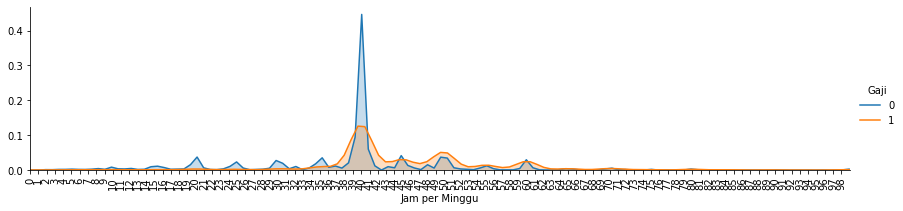

In [31]:
fig = sns.FacetGrid(train_df, hue = 'Gaji', aspect = 4)
fig.map(sns.kdeplot, 'Jam per Minggu' , shade = True)
fig.set(xlim = (0, train_df['Jam per Minggu'].max()))
plt.xticks(range(0,99,1), rotation=90)
fig.add_legend()

In [33]:
data = [train_df, test_df]
for dataset in data:
    dataset['Jam per Minggu'] = dataset['Jam per Minggu'].astype(int)
    
    dataset.loc[(dataset['Jam per Minggu'] <= 32) & (dataset['Jam per Minggu'] >= 63), 'Jam per Minggu'] = 0
    
    dataset.loc[(dataset['Jam per Minggu'] > 32) & (dataset['Jam per Minggu'] <= 37), 'Jam per Minggu'] = 1
    dataset.loc[(dataset['Jam per Minggu'] > 53) & (dataset['Jam per Minggu'] <= 59), 'Jam per Minggu'] = 1

    
    dataset.loc[(dataset['Jam per Minggu'] > 43) & (dataset['Jam per Minggu'] <= 48), 'Jam per Minggu'] = 2
    dataset.loc[(dataset['Jam per Minggu'] >= 59) & (dataset['Jam per Minggu'] < 63), 'Jam per Minggu'] = 2
    

    dataset.loc[(dataset['Jam per Minggu'] > 48) & (dataset['Jam per Minggu'] <= 53), 'Jam per Minggu'] = 3

    dataset.loc[(dataset['Jam per Minggu'] > 37) & (dataset['Jam per Minggu'] <= 43), 'Jam per Minggu'] = 4

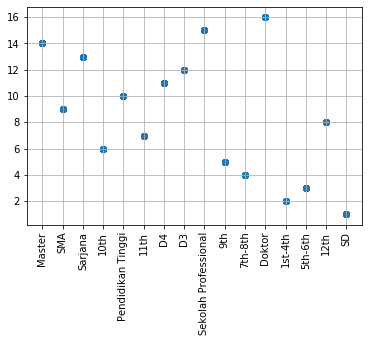

In [34]:
plt.scatter(train_df['Pendidikan'], train_df['Jmlh Tahun Pendidikan'])
plt.xticks(np.arange(0,16,1),rotation=90)
plt.grid(True)
plt.show()

In [35]:
data = [train_df, test_df]

for dataset in data:
    dataset['Jmlh Tahun Pendidikan'] = dataset['Jmlh Tahun Pendidikan'].astype(int)
    
    dataset.loc[(dataset['Jmlh Tahun Pendidikan'] == 1), 'Jmlh Tahun Pendidikan'] = 0
    dataset.loc[(dataset['Jmlh Tahun Pendidikan'] == 2), 'Jmlh Tahun Pendidikan'] = 1
    dataset.loc[(dataset['Jmlh Tahun Pendidikan'] == 3), 'Jmlh Tahun Pendidikan'] = 2
    dataset.loc[(dataset['Jmlh Tahun Pendidikan'] == 4), 'Jmlh Tahun Pendidikan'] = 3
    dataset.loc[(dataset['Jmlh Tahun Pendidikan'] == 5), 'Jmlh Tahun Pendidikan'] = 4
    dataset.loc[(dataset['Jmlh Tahun Pendidikan'] == 6), 'Jmlh Tahun Pendidikan'] = 5
    dataset.loc[(dataset['Jmlh Tahun Pendidikan'] == 7), 'Jmlh Tahun Pendidikan'] = 6
    dataset.loc[(dataset['Jmlh Tahun Pendidikan'] == 8), 'Jmlh Tahun Pendidikan'] = 7
    dataset.loc[(dataset['Jmlh Tahun Pendidikan'] == 9), 'Jmlh Tahun Pendidikan'] = 8
    dataset.loc[(dataset['Jmlh Tahun Pendidikan'] == 10), 'Jmlh Tahun Pendidikan'] = 9
    dataset.loc[(dataset['Jmlh Tahun Pendidikan'] == 11), 'Jmlh Tahun Pendidikan'] = 10
    dataset.loc[(dataset['Jmlh Tahun Pendidikan'] == 12), 'Jmlh Tahun Pendidikan'] = 11
    dataset.loc[(dataset['Jmlh Tahun Pendidikan'] == 13), 'Jmlh Tahun Pendidikan'] = 12
    dataset.loc[(dataset['Jmlh Tahun Pendidikan'] == 14), 'Jmlh Tahun Pendidikan'] = 13
    dataset.loc[(dataset['Jmlh Tahun Pendidikan'] == 15), 'Jmlh Tahun Pendidikan'] = 14
    dataset.loc[(dataset['Jmlh Tahun Pendidikan'] == 16), 'Jmlh Tahun Pendidikan'] = 15

In [36]:
genders = {'Laki2': 0, 'Perempuan': 1}
data = [train_df, test_df]

for dataset in data:
    dataset['Jenis Kelamin'] = dataset['Jenis Kelamin'].map(genders)

In [39]:
pend = {'SD':0, '1st-4th':1, '5th-6th':2, '7th-8th':3, '9th':4, '10th':5, '11th':6, '12th':7, 'SMA':8,
        'Pendidikan Tinggi':9, 'D4':10, 'D3':11, 'Sarjana':12, 'Master':13, 'Sekolah Professional':14,
        'Doktor':15}
data = [train_df, test_df]

for dataset in data:
    dataset['Pendidikan'] = dataset['Pendidikan'].map(pend)

In [41]:
data = [train_df, test_df]
for dataset in data:
    dataset['Umur'] = dataset['Umur'].astype(int)
    dataset.loc[(dataset['Umur'] >= 17) & (dataset['Umur'] <= 22), 'Umur'] = 0
    dataset.loc[(dataset['Umur'] > 22) & (dataset['Umur'] <= 27), 'Umur'] = 1
    dataset.loc[(dataset['Umur'] > 27) & (dataset['Umur'] <= 33), 'Umur'] = 2
    dataset.loc[(dataset['Umur'] > 33) & (dataset['Umur'] <= 40), 'Umur'] = 3
    dataset.loc[(dataset['Umur'] > 40) & (dataset['Umur'] <= 47), 'Umur'] = 4
    dataset.loc[(dataset['Umur'] > 47) & (dataset['Umur'] <= 55), 'Umur'] = 5
    dataset.loc[(dataset['Umur'] > 55), 'Umur'] = 6

In [42]:
train_df = pd.get_dummies(train_df, columns=['Status Perkawinan','Kelas Pekerja'])
test_df = pd.get_dummies(test_df, columns=['Status Perkawinan','Kelas Pekerja'])

In [43]:
train_df

,id,Umur,Berat Akhir,Pendidikan,Jmlh Tahun Pendidikan,Pekerjaan,Jenis Kelamin,Keuntungan Kapital,Kerugian Capital,Jam per Minggu,...,Status Perkawinan_Menikah LDR,Kelas Pekerja_?,Kelas Pekerja_Pekerja Bebas Bukan Perusahan,Kelas Pekerja_Pekerja Bebas Perusahaan,Kelas Pekerja_Pemerintah Lokal,Kelas Pekerja_Pemerintah Negara,Kelas Pekerja_Pemerintah Provinsi,Kelas Pekerja_Tanpa di Bayar,Kelas Pekerja_Tidak Pernah Bekerja,Kelas Pekerja_Wiraswasta
0,27247,6,139616,13,13,14,0,0,0,3,...,0,0,0,0,0,1,0,0,0,0
1,1640,5,158993,8,8,4,1,0,0,4,...,0,0,0,0,0,0,0,0,0,1
2,45206,5,284648,8,8,14,1,0,0,99,...,0,0,1,0,0,0,0,0,0,0
3,16154,4,132847,8,8,2,1,0,0,4,...,0,0,0,0,0,0,0,0,0,1
4,43023,2,103432,8,8,9,0,0,0,2,...,0,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
38264,46220,4,148169,8,8,11,0,0,0,4,...,0,0,1,0,0,0,0,0,0,0
38265,33268,6,264722,11,11,12,0,0,0,4,...,0,0,0,1,0,0,0,0,0,0
38266,44845,1,31606,12,12,13,1,0,0,20,...,0,0,1,0,0,0,0,0,0,0
38267,4517,4,197836,8,8,12,0,0,0,2,...,0,0,0,0,0,0,0,0,0,1


In [44]:
def find_missing_data(data):
    Total = data.isnull().sum().sort_values(ascending = False)
    Percentage = (data.isnull().sum()/data.isnull().count()).sort_values(ascending = False)
    
    return pd.concat([Total,Percentage] , axis = 1 , keys = ['Total' , '%'])

find_missing_data(train_df).head(5)

,Total,%
Kelas Pekerja_Wiraswasta,0,0.0
Kelas Pekerja_Tidak Pernah Bekerja,0,0.0
Umur,0,0.0
Berat Akhir,0,0.0
Pendidikan,0,0.0


In [46]:
train_df = train_df.drop(['id','Berat Akhir'], axis=1)
test_df = test_df.drop(['Berat Akhir'], axis=1)

In [47]:
train_df1 = train_df[train_df['Gaji']==0]
train_df2 = train_df[train_df['Gaji']==1]

train_df1 = train_df1[:len(train_df2)]
train_df = pd.concat([train_df1, train_df2])

In [48]:
train_df['Gaji'].value_counts()

1    9165
0    9165
Name: Gaji, dtype: int64

In [49]:
x_train = train_df.drop(['Gaji'], axis=1)
y_train = train_df['Gaji']
x_test = test_df.drop(labels=['id'],axis=1)

In [50]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

# Fit only to the training data
scaler.fit(x_train)

StandardScaler(copy=True, with_mean=True, with_std=True)

# Now apply the transformations to the data:
colnames = x_train.columns
colnames_test = x_test.columns
x_train = pd.DataFrame(scaler.transform(x_train), columns=colnames)
x_test = pd.DataFrame(scaler.transform(x_test), columns=colnames_test)

In [51]:
x_train.shape, x_test.shape

((18330, 23), (9599, 23))

In [58]:
x_train.columns

Index(['Umur', 'Pendidikan', 'Jmlh Tahun Pendidikan', 'Pekerjaan',
       'Jenis Kelamin', 'Keuntungan Kapital', 'Kerugian Capital',
       'Jam per Minggu', 'Status Perkawinan_Belum Pernah Menikah',
       'Status Perkawinan_Berpisah', 'Status Perkawinan_Cerai',
       'Status Perkawinan_Janda', 'Status Perkawinan_Menikah',
       'Status Perkawinan_Menikah LDR', 'Kelas Pekerja_?',
       'Kelas Pekerja_Pekerja Bebas Bukan Perusahan',
       'Kelas Pekerja_Pekerja Bebas Perusahaan',
       'Kelas Pekerja_Pemerintah Lokal', 'Kelas Pekerja_Pemerintah Negara',
       'Kelas Pekerja_Pemerintah Provinsi', 'Kelas Pekerja_Tanpa di Bayar',
       'Kelas Pekerja_Tidak Pernah Bekerja', 'Kelas Pekerja_Wiraswasta'],
      dtype='object')

In [59]:
GBC = GradientBoostingClassifier()
gb_param_grid = {
              'loss': ['deviance'],
              'n_estimators' : [300],
              'learning_rate':[0.1],
              'random_state':[None, 0, 1, 2]
              }

gsGBC = GridSearchCV(GBC, param_grid = gb_param_grid, cv=10, 
                     scoring='roc_auc')

gsGBC.fit(x_train,y_train)
GBC_best = gsGBC.best_estimator_

gsGBC.best_score_

0.9176174920116387

In [65]:
model_new = GBC_best

In [66]:
cv_score = cross_validate(model_new, x_train, y_train, cv=10, return_train_score=True)
print('Nilai score validasi model terhadap data training adalah :', cv_score['train_score'].mean())
print('Nilai score validasi model terhadap data test adalah :', cv_score['test_score'].mean())

Nilai score validasi model terhadap data training adalah : 0.8451536643026005
Nilai score validasi model terhadap data test adalah : 0.8342062193126022


In [67]:
y_pred = model_new.predict(x_test)

submission = pd.DataFrame({'id':test_df['id'],'Gaji':y_pred})

submission

,id,Gaji
0,47933,0
1,44213,0
2,20823,1
3,40565,1
4,9860,0
...,...,...
9594,13587,0
9595,33231,0
9596,18614,0
9597,37566,0


In [68]:
submission.shape

(9599, 2)

In [69]:
submission.to_csv('Prediksi Gaji - mlp.csv', index=False)

In [70]:
from sklearn.model_selection import train_test_split

x_train_uji, x_test_uji, y_train_uji, y_test_uji = train_test_split(x_train, y_train, test_size=0.25, random_state=10)

In [71]:
y_pred_uji = model_new.predict(x_test_uji)

print(classification_report(y_test_uji, y_pred_uji))

              precision    recall  f1-score   support

           0       0.86      0.83      0.85      2284
           1       0.84      0.87      0.85      2299

    accuracy                           0.85      4583
   macro avg       0.85      0.85      0.85      4583
weighted avg       0.85      0.85      0.85      4583



In [72]:
from sklearn.metrics import roc_auc_score

yprob_uji = model_new.predict_proba(x_test_uji)

y_pred_post_uji = yprob_uji[:,1]

sc_roc_auc_uji = roc_auc_score(y_test_uji, y_pred_post_uji)
print('Nilai score roc_auc untuk data test Uji adalah: ', sc_roc_auc_uji)

Nilai score roc_auc untuk data test Uji adalah:  0.9297969154334216


In [73]:
from sklearn.metrics import r2_score
accuracy = r2_score(y_test_uji, y_pred_uji)
print ('Cross-Predicted Accuracy:', accuracy)

Cross-Predicted Accuracy: 0.397767932299812
